## Introduction

5 examples of the application of ML methods in life:
1. House prices prediction
2. Medicin: diagnosis of diseases by photos of lungs
3. Using self-driving cars
4. Credit scoring
5. Sorting spam/good e-mail letters

МО позволит повысить точность, ускорить процесс, повысить эффективность и безопасность.

## Introduction to Data Analysis

In [137]:
import pandas as pd, numpy as np, sklearn, lightgbm, scipy, statsmodels
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [138]:
df = pd.read_json('data/train.json')

In [139]:
df

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,medium
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124000,1.0,3,92bbbf38baadfde0576fc496bd41749c,2016-04-05 03:58:33,There is 700 square feet of recently renovated...,W 171 Street,"[Elevator, Dishwasher, Hardwood Floors]",40.8433,6824800,-73.9396,a61e21da3ba18c7a3d54cfdcc247e1f8,[https://photos.renthop.com/2/6824800_0682be16...,2800,620 W 171 Street,low
124002,1.0,2,5565db9b7cba3603834c4aa6f2950960,2016-04-02 02:25:31,"2 bedroom apartment with updated kitchen, rece...",Broadway,"[Common Outdoor Space, Cats Allowed, Dogs Allo...",40.8198,6813268,-73.9578,8f90e5e10e8a2d7cf997f016d89230eb,[https://photos.renthop.com/2/6813268_1e6fcc32...,2395,3333 Broadway,medium
124004,1.0,1,67997a128056ee1ed7d046bbb856e3c7,2016-04-26 05:42:03,No Brokers Fee * Never Lived 1 Bedroom 1 Bathr...,210 Brighton 15th St,"[Dining Room, Elevator, Pre-War, Laundry in Bu...",40.5765,6927093,-73.9554,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/6927093_93a52104...,1850,210 Brighton 15th St,medium
124008,1.0,2,3c0574a740154806c18bdf1fddd3d966,2016-04-19 02:47:33,Wonderful Bright Chelsea 2 Bedroom apartment o...,West 21st Street,"[Pre-War, Laundry in Unit, Dishwasher, No Fee,...",40.7448,6892816,-74.0017,c3cd45f4381ac371507090e9ffabea80,[https://photos.renthop.com/2/6892816_1a8d087a...,4195,350 West 21st Street,medium


In [140]:
# What is the size of your data?
df.shape

(49352, 15)

In [141]:
# Print the list of columns. Which column is a target?
df.columns

Index(['bathrooms', 'bedrooms', 'building_id', 'created', 'description',
       'display_address', 'features', 'latitude', 'listing_id', 'longitude',
       'manager_id', 'photos', 'price', 'street_address', 'interest_level'],
      dtype='object')

In [142]:
# Make a quick analysis of the data: use the methods info(), describe(), corr(). Explain the results of the outputs. Are there any empty columns?
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 49352 entries, 4 to 124009
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bathrooms        49352 non-null  float64
 1   bedrooms         49352 non-null  int64  
 2   building_id      49352 non-null  object 
 3   created          49352 non-null  object 
 4   description      49352 non-null  object 
 5   display_address  49352 non-null  object 
 6   features         49352 non-null  object 
 7   latitude         49352 non-null  float64
 8   listing_id       49352 non-null  int64  
 9   longitude        49352 non-null  float64
 10  manager_id       49352 non-null  object 
 11  photos           49352 non-null  object 
 12  price            49352 non-null  int64  
 13  street_address   49352 non-null  object 
 14  interest_level   49352 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB
None
         bathrooms      bedrooms      latitude

In [143]:
numeric_df = df.select_dtypes(include='number')
print(numeric_df.corr())

            bathrooms  bedrooms  latitude  listing_id  longitude     price
bathrooms    1.000000  0.533446 -0.009657    0.000776   0.010393  0.069661
bedrooms     0.533446  1.000000 -0.004745    0.011968   0.006892  0.051788
latitude    -0.009657 -0.004745  1.000000    0.001712  -0.966807 -0.000707
listing_id   0.000776  0.011968  0.001712    1.000000  -0.000907  0.008090
longitude    0.010393  0.006892 -0.966807   -0.000907   1.000000 -0.000087
price        0.069661  0.051788 -0.000707    0.008090  -0.000087  1.000000


In [144]:
df.isna().sum()

bathrooms          0
bedrooms           0
building_id        0
created            0
description        0
display_address    0
features           0
latitude           0
listing_id         0
longitude          0
manager_id         0
photos             0
price              0
street_address     0
interest_level     0
dtype: int64

In [145]:
# We'll work with only 3 features: 'bathrooms', 'bedrooms', 'interest_level' and with the target column 'price'. Create a dataframe with only these columns.
df = df[['bathrooms', 'bedrooms', 'interest_level', 'price']]

In [146]:
df

,bathrooms,bedrooms,interest_level,price
4,1.0,1,medium,2400
6,1.0,2,low,3800
9,1.0,2,medium,3495
10,1.5,3,medium,3000
15,1.0,0,low,2795
...,...,...,...,...
124000,1.0,3,low,2800
124002,1.0,2,medium,2395
124004,1.0,1,medium,1850
124008,1.0,2,medium,4195


## Statistical Data Analysis

#### Target Analysis

In [147]:
df['price'].unique

<bound method Series.unique of 4         2400
6         3800
9         3495
10        3000
15        2795
          ... 
124000    2800
124002    2395
124004    1850
124008    4195
124009    4280
Name: price, Length: 49352, dtype: int64>

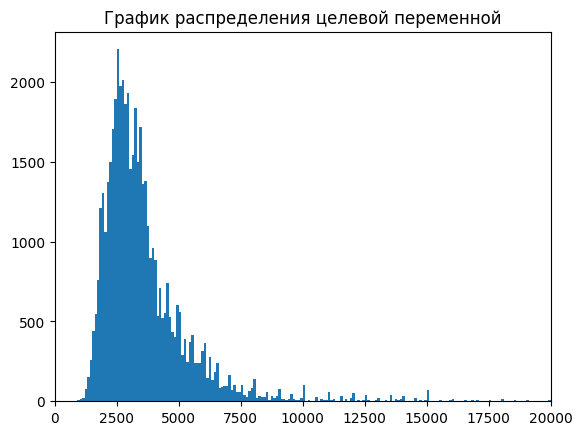

In [148]:
plt.hist(df['price'], bins=1000, range=(0, 100000))
plt.xlim(0, 20000)
plt.title('График распределения целевой переменной')
plt.show()

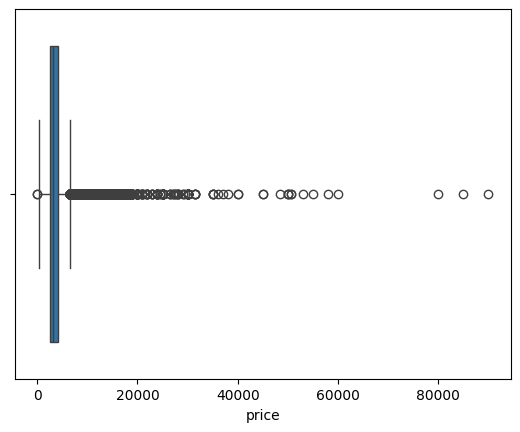

In [149]:
df_filtered = df[df['price'] < 100000]
sns.boxplot(x=df_filtered['price']);

In [150]:
percentile_1 = np.percentile(df['price'], 1)
percentile_99 = np.percentile(df['price'], 99)
print(f'percentile_1 is {percentile_1}')
print(f'percentile_99 is {percentile_99}')

percentile_1 is 1475.0
percentile_99 is 13000.0


In [151]:
df = df[(df['price'] >= percentile_1) & (df['price'] <= percentile_99)]

In [152]:
df

,bathrooms,bedrooms,interest_level,price
4,1.0,1,medium,2400
6,1.0,2,low,3800
9,1.0,2,medium,3495
10,1.5,3,medium,3000
15,1.0,0,low,2795
...,...,...,...,...
124000,1.0,3,low,2800
124002,1.0,2,medium,2395
124004,1.0,1,medium,1850
124008,1.0,2,medium,4195


(array([ 5127.,  9766., 10808.,  7705.,  4636.,  3047.,  2533.,  1514.,
         1062.,   578.,   371.,   331.,   163.,   189.,   157.,    46.,
          114.,    58.,    84.,    90.]),
 array([ 1475.  ,  2051.25,  2627.5 ,  3203.75,  3780.  ,  4356.25,
         4932.5 ,  5508.75,  6085.  ,  6661.25,  7237.5 ,  7813.75,
         8390.  ,  8966.25,  9542.5 , 10118.75, 10695.  , 11271.25,
        11847.5 , 12423.75, 13000.  ]),
 <BarContainer object of 20 artists>)

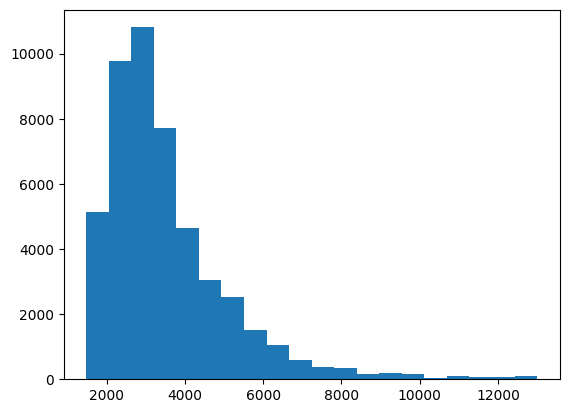

In [153]:
plt.hist(df['price'], bins=20)

#### Characteristics Analysis

In [154]:
df['interest_level'].info()

<class 'pandas.core.series.Series'>
Index: 48379 entries, 4 to 124009
Series name: interest_level
Non-Null Count  Dtype 
--------------  ----- 
48379 non-null  object
dtypes: object(1)
memory usage: 755.9+ KB


In [155]:
df['interest_level'].value_counts()

interest_level
low       33697
medium    11116
high       3566
Name: count, dtype: int64

In [156]:
df['interest_level'] = df['interest_level'].replace({'low': 0, 'medium': 1, 'high': 2})

/var/folders/c1/vlhtp151719c1jl628x1pcrm0000gn/T/ipykernel_8741/3401095703.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['interest_level'] = df['interest_level'].replace({'low': 0, 'medium': 1, 'high': 2})
/var/folders/c1/vlhtp151719c1jl628x1pcrm0000gn/T/ipykernel_8741/3401095703.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['interest_level'] = df['interest_level'].replace({'low': 0, 'medium': 1, 'high': 2})


In [157]:
df['interest_level']

4         1
6         0
9         1
10        1
15        0
         ..
124000    0
124002    1
124004    1
124008    1
124009    2
Name: interest_level, Length: 48379, dtype: int64

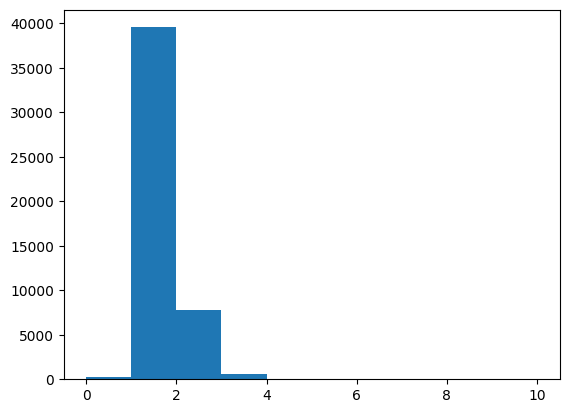

In [158]:
plt.hist(df['bathrooms'], bins=10);

(array([9.2010e+03, 1.5540e+04, 1.4546e+04, 7.0610e+03, 0.0000e+00,
        1.7780e+03, 2.0600e+02, 4.4000e+01, 1.0000e+00, 2.0000e+00]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

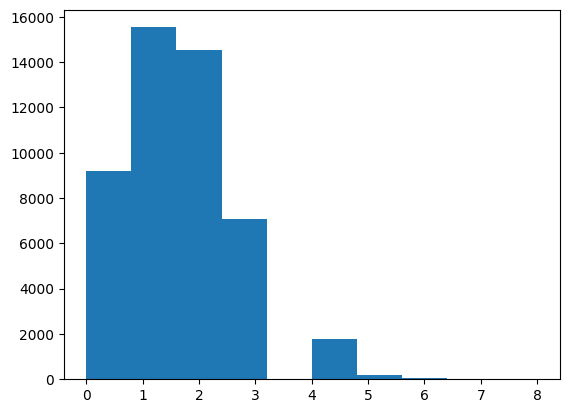

In [159]:
plt.hist(df['bedrooms'], bins=10)

#### Complex Analysis

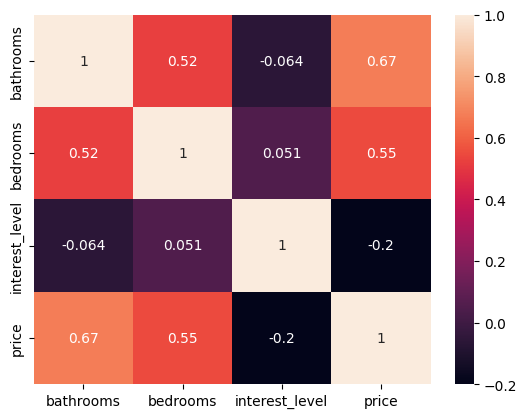

In [160]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True);

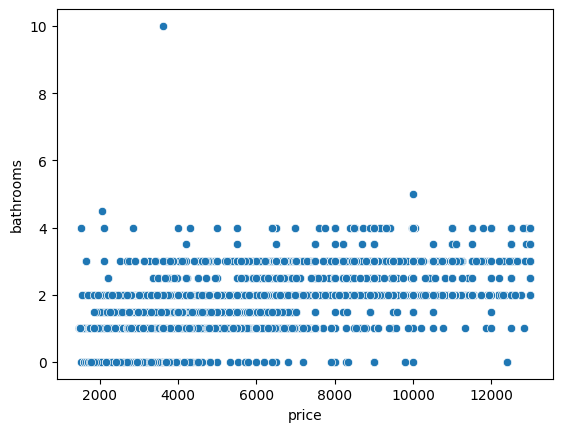

In [161]:
sns.scatterplot(x=df['price'], y=df['bathrooms']);

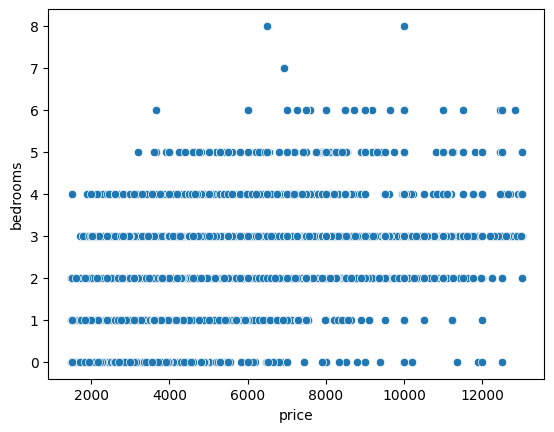

In [162]:
sns.scatterplot(x=df['price'], y=df['bedrooms']);

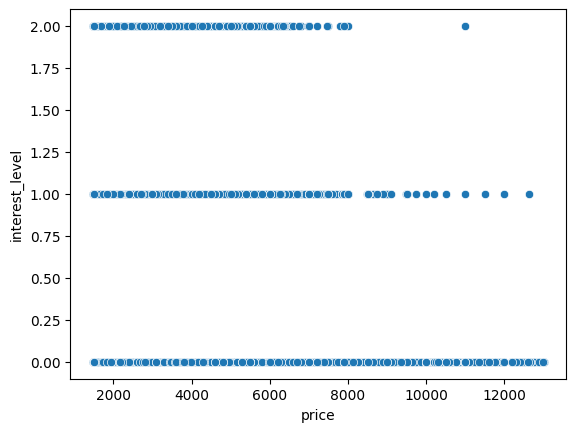

In [163]:
sns.scatterplot(x=df['price'], y=df['interest_level']);

## Creating Features

In [164]:
X_train = df.drop(['price', 'interest_level'], axis=1)
y_train = df['price']

In [165]:
df_test = pd.read_json('data/test.json')

In [166]:
df_test = df_test[['bathrooms', 'bedrooms', 'price']]

In [167]:
X_test = df_test.drop('price', axis=1)
y_test = df_test['price']

In [168]:
polynomial_converter = PolynomialFeatures(degree=10)
polynomial_converter.fit(X_train)

X_train_new = pd.DataFrame(data=polynomial_converter.transform(X_train),
                           columns=polynomial_converter.get_feature_names_out())
X_test_new = pd.DataFrame(data=polynomial_converter.transform(X_test),
                          columns=polynomial_converter.get_feature_names_out())

In [169]:
X_test_new

,1,bathrooms,bedrooms,bathrooms^2,bathrooms bedrooms,bedrooms^2,bathrooms^3,bathrooms^2 bedrooms,bathrooms bedrooms^2,bedrooms^3,...,bathrooms^9 bedrooms,bathrooms^8 bedrooms^2,bathrooms^7 bedrooms^3,bathrooms^6 bedrooms^4,bathrooms^5 bedrooms^5,bathrooms^4 bedrooms^6,bathrooms^3 bedrooms^7,bathrooms^2 bedrooms^8,bathrooms bedrooms^9,bedrooms^10
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,2.0,1.0,2.0,4.0,1.0,2.0,4.0,8.0,...,2.0,4.0,8.0,16.0,32.0,64.0,128.0,256.0,512.0,1024.0
2,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,2.0,1.0,2.0,4.0,1.0,2.0,4.0,8.0,...,2.0,4.0,8.0,16.0,32.0,64.0,128.0,256.0,512.0,1024.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74654,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
74655,1.0,1.0,2.0,1.0,2.0,4.0,1.0,2.0,4.0,8.0,...,2.0,4.0,8.0,16.0,32.0,64.0,128.0,256.0,512.0,1024.0
74656,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74657,1.0,2.0,2.0,4.0,4.0,4.0,8.0,8.0,8.0,8.0,...,1024.0,1024.0,1024.0,1024.0,1024.0,1024.0,1024.0,1024.0,1024.0,1024.0


## Training of 3 Models: linear regression, decision tree and native model

In [170]:
result_MAE = pd.DataFrame(columns=['model', 'train', 'test'])
result_RMSE = pd.DataFrame(columns=['model', 'train', 'test'])

In [171]:
# Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
train_mae = mean_absolute_error(y_train, y_pred)
train_mse = mean_squared_error(y_train, y_pred)
train_rmse = np.sqrt(train_mse)

y_pred = model.predict(X_test)
test_mae = mean_absolute_error(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)

In [172]:
result_MAE.loc[0] = ['linear_regression', train_mae, test_mae]
result_RMSE.loc[0] = ['linear_regression', train_rmse, test_rmse]

In [173]:
# Decision Tree Regression
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
train_mae = mean_absolute_error(y_train, y_pred)
train_mse = mean_squared_error(y_train, y_pred)
train_rmse = np.sqrt(train_mse)

y_pred = model.predict(X_test)
test_mae = mean_absolute_error(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)

result_MAE.loc[1] = ['decision_tree', train_mae, test_mae]
result_RMSE.loc[1] = ['decision_tree', train_rmse, test_rmse]

In [174]:
# Native Models
train_mean_price = np.mean(y_train)
train_median_price = np.median(y_train)
test_mean_price = np.mean(y_test)
test_median_price = np.median(y_test)

y_pred = [train_mean_price] * len(y_train)
train_mae = mean_absolute_error(y_train, y_pred)
train_mse = mean_squared_error(y_train, y_pred)
train_rmse = np.sqrt(train_mse)

y_pred = [test_mean_price] * len(y_test)
test_mae = mean_absolute_error(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)

result_MAE.loc[2] = ['native_mean', train_mae, test_mae]
result_RMSE.loc[2] = ['native_mean', train_rmse, test_rmse]

In [175]:
y_pred = [train_median_price] * len(y_train)
train_mae = mean_absolute_error(y_train, y_pred)
train_mse = mean_squared_error(y_train, y_pred)
train_rmse = np.sqrt(train_mse)

y_pred = [test_median_price] * len(y_test)
test_mae = mean_absolute_error(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)

result_MAE.loc[3] = ['native_median', train_mae, test_mae]
result_RMSE.loc[3] = ['native_median', train_rmse, test_rmse]

In [176]:
## Compare the results
result_MAE

,model,train,test
0,linear_regression,784.563837,986.046717
1,decision_tree,756.044735,953.592155
2,native_mean,1139.192515,1440.961299
3,native_median,1086.210505,1322.640673


In [184]:
result_RMSE

,model,train,test
0,linear_regression,1077.566356,3.958916e+18
1,decision_tree,1077.483596,9.590243e+03
2,native_mean,1597.646655,9.713027e+03
3,native_median,1644.236439,9.731481e+03


Best model: DecisionTreeRegressor


## Additional


In [178]:
# Using Polynomial Features
result_MAE = pd.DataFrame(columns=['model', 'train', 'test'])
result_RMSE = pd.DataFrame(columns=['model', 'train', 'test'])

In [179]:
# Linear Regression
model = LinearRegression()
model.fit(X_train_new, y_train)
y_pred = model.predict(X_train_new)
train_mae = mean_absolute_error(y_train, y_pred)
train_mse = mean_squared_error(y_train, y_pred)
train_rmse = np.sqrt(train_mse)

y_pred = model.predict(X_test_new)
test_mae = mean_absolute_error(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)

result_MAE.loc[0] = ['linear_regression', train_mae, test_mae]
result_RMSE.loc[0] = ['linear_regression', train_rmse, test_rmse]

In [180]:
# Decision Tree Regression
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train_new, y_train)
y_pred = model.predict(X_train_new)
train_mae = mean_absolute_error(y_train, y_pred)
train_mse = mean_squared_error(y_train, y_pred)
train_rmse = np.sqrt(train_mse)

y_pred = model.predict(X_test_new)
test_mae = mean_absolute_error(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)

result_MAE.loc[1] = ['decision_tree', train_mae, test_mae]
result_RMSE.loc[1] = ['decision_tree', train_rmse, test_rmse]

In [181]:
# Native Models
train_mean_price = np.mean(y_train)
train_median_price = np.median(y_train)
test_mean_price = np.mean(y_test)
test_median_price = np.median(y_test)

y_pred = [train_mean_price] * len(y_train)
train_mae = mean_absolute_error(y_train, y_pred)
train_mse = mean_squared_error(y_train, y_pred)
train_rmse = np.sqrt(train_mse)

y_pred = [test_mean_price] * len(y_test)
test_mae = mean_absolute_error(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)

result_MAE.loc[2] = ['native_mean', train_mae, test_mae]
result_RMSE.loc[2] = ['native_mean', train_rmse, test_rmse]

y_pred = [train_median_price] * len(y_train)
train_mae = mean_absolute_error(y_train, y_pred)
train_mse = mean_squared_error(y_train, y_pred)
train_rmse = np.sqrt(train_mse)

y_pred = [test_median_price] * len(y_test)
test_mae = mean_absolute_error(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)

result_MAE.loc[3] = ['native_median', train_mae, test_mae]
result_RMSE.loc[3] = ['native_median', train_rmse, test_rmse]

In [182]:
result_MAE

,model,train,test
0,linear_regression,756.040299,1.448889e+16
1,decision_tree,756.044735,9.541270e+02
2,native_mean,1139.192515,1.440961e+03
3,native_median,1086.210505,1.322641e+03


In [183]:
result_RMSE

,model,train,test
0,linear_regression,1077.566356,3.958916e+18
1,decision_tree,1077.483596,9.590243e+03
2,native_mean,1597.646655,9.713027e+03
3,native_median,1644.236439,9.731481e+03
